<a href="https://www.kaggle.com/concyclics/people-s-daily-wordcloud-visualization?scriptVersionId=89535614" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# People's Daily WordCloud Visualization
#### Author: Concyclics

## Content
In this notebook, we are going to use jieba to split chinese words and use *wordcloud* to generate a visualization of news keyword like below.
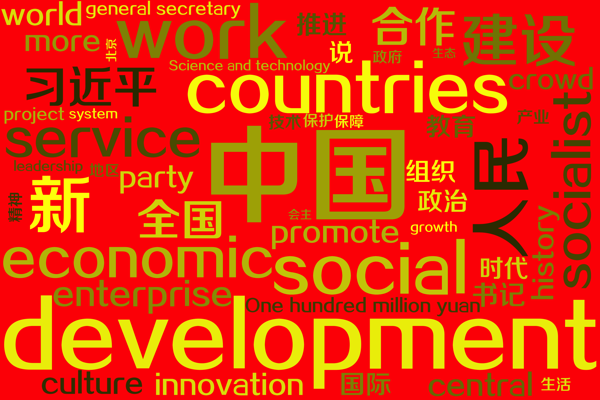

And also we will use *zhon* and some other method to clean the word data.

## 1. Load and split

### 1.1 Load newspath

In [1]:
import os

newspath=[]
for dirname, _, filenames in os.walk('../input/renmindaily/data'):
    for filename in filenames:
        newspath.append(os.path.join(dirname, filename))

print("total news: ",len(newspath))

total news:  29038


### 1.2 Preview of news

In [2]:
from random import sample
for eachpath in sample(newspath,k=2):
    print("path: ", eachpath)
    with open(eachpath,'r') as f:
        news=f.read()
        print(news)
        print('\n\n')
    

path:  ../input/renmindaily/data/RenMin_Daily/20220207-07-05.txt

努力成为阐释党的创新理论坚强阵地（信息快递）
——“‘三大体系’建设与学术期刊的责任和使命研讨会”述要
　　建设中国特色、中国风格、中国气派的学科体系、学术体系、话语体系（以下简称“三大体系”），是构建中国特色哲学社会科学的内在要求。河北学刊杂志社主办的“‘三大体系’建设与学术期刊的责任和使命研讨会”日前在河北省石家庄市举行。与会者围绕“三大体系”建设与新时代综合性学术期刊的发展与创新展开研讨。
　　与会者提出，推进中国特色哲学社会科学“三大体系”建设，要增强问题意识，处理好哲学社会科学研究中传统与现代、全球化与本土化的关系，打破学科壁垒，建立科学合理的科研管理体制和评价体系。新时代综合性学术期刊在“三大体系”建设中承担着重要使命，要努力成为阐释党的创新理论的坚强阵地，展示高水平研究成果，支持优秀学术人才成长。




path:  ../input/renmindaily/data/RenMin_Daily/20210323-11-04.txt
四部门发布规定
规范手机应用程序信息收集范围

　　本报北京3月22日电  （记者张璁）记者获悉：近日，国家互联网信息办公室、工业和信息化部、公安部、国家市场监督管理总局四部门联合发布《常见类型移动互联网应用程序必要个人信息范围规定》（以下简称《规定》），旨在落实《中华人民共和国网络安全法》关于个人信息收集合法、正当、必要的原则，规范移动互联网应用程序（APP）个人信息收集行为，保障公民个人信息安全。
　　随着移动互联网快速发展，各类应用程序迅速普及应用，在促进经济社会发展、服务民生等方面发挥了重要作用。但同时，APP超范围收集用户个人信息问题十分突出，特别是大量APP通过捆绑功能服务一揽子索取个人信息授权，用户拒绝授权就无法使用APP基本功能服务。为规范收集个人信息活动，《规定》明确了地图导航、网络约车、即时通信、网络购物等39类常见类型移动应用程序必要个人信息范围，要求其运营者不得因用户不同意提供非必要个人信息而拒绝用户使用APP基本功能服务。






### 1.3 View the split of JieBa

In [3]:
import jieba

from random import sample
for eachpath in sample(newspath,k=1):
    #print("path: ", eachpath)
    with open(eachpath,'r') as f:
        news=f.read()
        print('origin news: ')
        print(news)
        
        print('split by simple mode: ')
        print("/".join(jieba.lcut(news)))
        
        print('split by cut_all mode: ')
        print("/".join(jieba.lcut(news, cut_all=True)))
        
        print('split by search mode: ')
        print("/".join(jieba.lcut_for_search(news)))

Building prefix dict from the default dictionary ...


origin news: 

吉尔吉斯斯坦总统接种中国疫苗

　　据新华社比什凯克7月24日电  （记者关建武、努尔然）据吉尔吉斯斯坦总统新闻局23日消息，吉总统扎帕罗夫当天在首都比什凯克一处疫苗接种点接种了中国国药新冠疫苗。

split by simple mode: 


Dumping model to file cache /tmp/jieba.cache
Loading model cost 1.236 seconds.
Prefix dict has been built successfully.



/吉尔吉斯斯坦/总统/接种/中国/疫苗/
/
/　/　/据/新华社/比什凯克/7/月/24/日电/ / /（/记者/关/建武/、/努尔/然/）/据/吉尔吉斯斯坦/总统/新闻局/23/日/消息/，/吉/总统/扎/帕罗/夫/当天/在/首都/比什凯克/一处/疫苗/接种/点/接种/了/中国/国药/新冠/疫苗/。/

split by cut_all mode: 
/
//吉尔吉/吉尔吉斯/吉尔吉斯斯坦/吉斯/斯/坦/总统/接种/中国/疫苗//
//
//　//　//据/新华/新华社/比什/比什凯克/凯克/7/月/24/日电// // /（/记者/关/建武/、/努尔/然/）/据/吉尔吉/吉尔吉斯/吉尔吉斯斯坦/吉斯/斯/坦/总统/新闻/新闻局/23/日/消息/，/吉/总统/扎/帕罗/夫/当天/在/首都/比什/比什凯克/凯克/一处/疫苗/接种/点/接种/了/中国/国药/新/冠/疫苗/。/
/
split by search mode: 

/吉斯/吉尔吉/吉尔吉斯斯坦/总统/接种/中国/疫苗/
/
/　/　/据/新华/新华社/比什/凯克/比什凯克/7/月/24/日电/ / /（/记者/关/建武/、/努尔/然/）/据/吉斯/吉尔吉/吉尔吉斯斯坦/总统/新闻/新闻局/23/日/消息/，/吉/总统/扎/帕罗/夫/当天/在/首都/比什/凯克/比什凯克/一处/疫苗/接种/点/接种/了/中国/国药/新冠/疫苗/。/



The search mode best fits what we want. It split each possible keywords.

### 1.4 remove space, number and punctuations

#### 1.4.1 remove punctuation before split

In [4]:
!pip install zhon

     |████████████████████████████████| 99 kB 1.1 MB/s            
  Preparing metadata (setup.py) ... - done
  Created wheel for zhon: filename=zhon-1.1.5-py3-none-any.whl size=84322 sha256=a1b26a95bd0302ea2f850a19854a1cd0cbadb8c6fe84b57b4491caef29f74feb
  Stored in directory: /root/.cache/pip/wheels/d0/56/17/2675c4c7413a72bf173062e8d0a16503e3b2607745aa84988d
Successfully built zhon


In [5]:
import re
from zhon.hanzi import punctuation as puncZH
from string import punctuation as puncEN

def removePunctuation(s:str):
    s=re.sub(r"[%s]+" %puncZH, "",s)
    s=re.sub(r"[%s]+" %puncEN, "",s)
    s=re.sub(r"[\d\n\t\r]+", "",s)
    return s

In [6]:
from random import choice

news = open(choice(newspath),'r').read()
print(news)

安徽巢湖市庙岗乡——
被占农田基本恢复原貌（反馈）

　　本报读者来信版2020年12月7日刊登《被占良田没有恢复原貌》一文，反映安徽省巢湖市庙岗乡杨碾洼村附近，拓宽高速公路曾临时征用田地，但施工结束后留下废弃建筑和连片荒地，两年无人问津。
　　当地有关部门了解情况后，立即研究制定整改方案，并深入恢复田地作业一线，检查监督施工质量，保证整改进展。笔者在现场看到，有关部门调集多台挖掘机、运输车等，拆除并搬走遗留下的配电房、水泥、石子、废弃油桶等，乡干部、村干部和一些村民也参与其中。经过多天连续作业，基本恢复了农田原貌（见上图）。
　　江苏南京  方  言



In [7]:
print(removePunctuation(news))

安徽巢湖市庙岗乡被占农田基本恢复原貌反馈本报读者来信版年月日刊登被占良田没有恢复原貌一文反映安徽省巢湖市庙岗乡杨碾洼村附近拓宽高速公路曾临时征用田地但施工结束后留下废弃建筑和连片荒地两年无人问津当地有关部门了解情况后立即研究制定整改方案并深入恢复田地作业一线检查监督施工质量保证整改进展笔者在现场看到有关部门调集多台挖掘机运输车等拆除并搬走遗留下的配电房水泥石子废弃油桶等乡干部村干部和一些村民也参与其中经过多天连续作业基本恢复了农田原貌见上图江苏南京  方  言


In [8]:
print("/".join(jieba.lcut_for_search(news)))
print("/".join(jieba.lcut_for_search(removePunctuation(news))))

安徽/巢湖/巢湖市/庙岗乡/—/—/
/被/占/农田/基本/农田基本/恢复/原貌/（/反馈/）/
/
/　/　/本报/读者/来信/来信版/2020/年/12/月/7/日/刊登/《/被/占/良田/没有/恢复/原貌/》/一文/，/反映/安徽/安徽省/巢湖/巢湖市/庙岗乡/杨/碾/洼村/附近/，/拓宽/高速/公路/高速公路/曾/临时/征用/田地/，/但/施工/结束/后/留下/废弃/建筑/和/连片/荒地/，/两年/无人/问津/无人问津/。/
/　/　/当地/有关/部门/了解/情况/后/，/立即/研究/制定/整改/方案/，/并/深入/恢复/田地/作业/一线/，/检查/监督/施工/质量/，/保证/整改/进展/。/笔者/在/现场/看到/，/有关/部门/调集/多台/挖掘/挖掘机/、/运输/运输车/等/，/拆除/并/搬走/遗留/留下/遗留下/的/配电/配电房/、/水泥/、/石子/、/废弃/油桶/等/，/干部/乡干部/、/干部/村干部/和/一些/村民/也/参与/其中/。/经过/多天/连续/作业/，/基本/恢复/了/农田/原貌/（/上图/见上图/）/。/
/　/　/江苏/南京/ / /方/ / /言/

安徽/巢湖/巢湖市/庙岗乡/被/占/农田/基本/农田基本/恢复/原貌/反馈/本报/读者/来信/来信版/年月日/刊登/被/占/良田/没有/恢复/原貌/一文/反映/安徽/安徽省/巢湖/巢湖市/庙岗乡/杨/碾/洼村/附近/拓宽/高速/公路/高速公路/曾/临时/征用/田地/但/施工/结束/后/留下/废弃/建筑/和/连片/荒地/两年/无人/问津/无人问津/当地/有关/部门/了解/情况/后/立即/研究/制定/整改/方案/并/深入/恢复/田地/作业/一线/检查/监督/施工/质量/保证/质量保证/整改/进展/笔者/在/现场/看到/有关/部门/调集/多台/挖掘/挖掘机/运输/运输车/等/拆除/并/搬走/遗留/留下/遗留下/的/配电/配电房/水泥/石子/废弃/油桶/等/干部/乡干部/干部/村干部/和/一些/村民/也/参与/其中/经过/多天/连续/作业/基本/恢复/了/农田/原貌/上图/见上图/江苏/南京/ / /方/ / /言


#### 1.4.2 remove after split

In [9]:
import re
from zhon.hanzi import punctuation as puncZH
from string import punctuation as puncEN

def hasPunctuation(s:str):
    f=False
    f|=bool(re.match(r"[%s]+" %puncZH, s))
    f|=bool(re.match(r"[%s]+" %puncEN, s))
    f|=bool(re.match(r"[\d\n\t\r]+", s))
    return f

In [10]:
split_news=jieba.lcut_for_search(news)
removed_split_news=[]
for text in split_news:
    if hasPunctuation(text) is False:
        removed_split_news.append(text)

print("/".join(jieba.lcut_for_search(news)))
print("/".join(removed_split_news))

安徽/巢湖/巢湖市/庙岗乡/—/—/
/被/占/农田/基本/农田基本/恢复/原貌/（/反馈/）/
/
/　/　/本报/读者/来信/来信版/2020/年/12/月/7/日/刊登/《/被/占/良田/没有/恢复/原貌/》/一文/，/反映/安徽/安徽省/巢湖/巢湖市/庙岗乡/杨/碾/洼村/附近/，/拓宽/高速/公路/高速公路/曾/临时/征用/田地/，/但/施工/结束/后/留下/废弃/建筑/和/连片/荒地/，/两年/无人/问津/无人问津/。/
/　/　/当地/有关/部门/了解/情况/后/，/立即/研究/制定/整改/方案/，/并/深入/恢复/田地/作业/一线/，/检查/监督/施工/质量/，/保证/整改/进展/。/笔者/在/现场/看到/，/有关/部门/调集/多台/挖掘/挖掘机/、/运输/运输车/等/，/拆除/并/搬走/遗留/留下/遗留下/的/配电/配电房/、/水泥/、/石子/、/废弃/油桶/等/，/干部/乡干部/、/干部/村干部/和/一些/村民/也/参与/其中/。/经过/多天/连续/作业/，/基本/恢复/了/农田/原貌/（/上图/见上图/）/。/
/　/　/江苏/南京/ / /方/ / /言/

安徽/巢湖/巢湖市/庙岗乡/被/占/农田/基本/农田基本/恢复/原貌/反馈/本报/读者/来信/来信版/年/月/日/刊登/被/占/良田/没有/恢复/原貌/一文/反映/安徽/安徽省/巢湖/巢湖市/庙岗乡/杨/碾/洼村/附近/拓宽/高速/公路/高速公路/曾/临时/征用/田地/但/施工/结束/后/留下/废弃/建筑/和/连片/荒地/两年/无人/问津/无人问津/当地/有关/部门/了解/情况/后/立即/研究/制定/整改/方案/并/深入/恢复/田地/作业/一线/检查/监督/施工/质量/保证/整改/进展/笔者/在/现场/看到/有关/部门/调集/多台/挖掘/挖掘机/运输/运输车/等/拆除/并/搬走/遗留/留下/遗留下/的/配电/配电房/水泥/石子/废弃/油桶/等/干部/乡干部/干部/村干部/和/一些/村民/也/参与/其中/经过/多天/连续/作业/基本/恢复/了/农田/原貌/上图/见上图/江苏/南京/ / /方/ / /言


### 1.5 using remove after split

In [11]:
def getWords(news:str):
    split_news=jieba.lcut_for_search(news)
    removed_split_news=[]
    for text in split_news:
        if hasPunctuation(text) is False:
            removed_split_news.append(text)
    return removed_split_news


In [12]:
words=[]
for path in sample(newspath,k=1000):
    news = open(path,'r').read()
    words += getWords(news)
    
print('total words' ,len(words))

total words 840080


## 2. Generate Wordcloud

### 2.1 count word frequency

In [13]:
word_count={}
for word in words:
    word_count[word]=word_count.get(word,0)+1
print('total unique words' ,len(word_count))

total unique words 59859


In [14]:
import pandas as pd

word_ds=pd.DataFrame(word_count,index=[0])
word_ds=word_ds.T
word_ds.columns=['count']

In [15]:
word_ds

,count
图片,74
报道,117
月,1847
日,861
京新,3
...,...
剪指甲,1
洗脚,1
垃圾桶,1
舍己,1


**Too many no-meaning words here**

In [16]:
word_ds.sort_values(by=['count'],ascending=False,inplace=True)
word_ds.head(10)

,count
的,29651
和,8530
在,7224
了,6371
,6057
发展,5572
中国,5429
是,4529
为,3713
等,3208


### 2.2 remove stopwords

In [17]:
!wget https://codeload.github.com/Concyclics/stopwords/zip/refs/heads/master
!unzip master

--2022-03-08 01:22:29--  https://codeload.github.com/Concyclics/stopwords/zip/refs/heads/master
Resolving codeload.github.com (codeload.github.com)... 140.82.113.9
Connecting to codeload.github.com (codeload.github.com)|140.82.113.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master’

master                  [ <=>                ]  13.87K  --.-KB/s    in 0.06s   

2022-03-08 01:22:30 (242 KB/s) - ‘master’ saved [14200]

Archive:  master
1de4e063cdc6b50d1b94392bcd2a5063b468b0be
   creating: stopwords-master/
  inflating: stopwords-master/README.md  
  inflating: stopwords-master/baidu_stopwords.txt  
  inflating: stopwords-master/cn_stopwords.txt  
  inflating: stopwords-master/hit_stopwords.txt  
  inflating: stopwords-master/scu_stopwords.txt  


In [18]:
stopwords=[]

for dirname, _, filenames in os.walk('./stopwords-master'):
    for filename in filenames:
        with open(os.path.join(dirname, filename)) as f:
            if filename.endswith('txt'):
                stopwords+=list(f.read().split())
    
stopwords.append('年')
stopwords.append('月')
stopwords.append('日')
stopwords.append('上')
stopwords.append('中')
stopwords.append('本报')
stopwords.append('\xa0')

stopwords=list(set(stopwords))
print('stopwords in total: ',len(stopwords))

stopwords in total:  2318


In [19]:
for stopword in stopwords:
    if stopword in word_count:
        word_count.pop(stopword) 

print('total unique words without stopwords' ,len(word_count))

total unique words without stopwords 58805


In [20]:
word_ds=pd.DataFrame(word_count,index=[0])
word_ds=word_ds.T
word_ds.columns=['count']

word_ds.sort_values(by=['count'],ascending=False,inplace=True)
word_ds.head(20)

,count
发展,5572
中国,5429
工作,3030
人民,2854
新,2784
建设,2604
社会,2584
国家,2561
书记,2504
服务,1776


### 2.3 create wordcloud

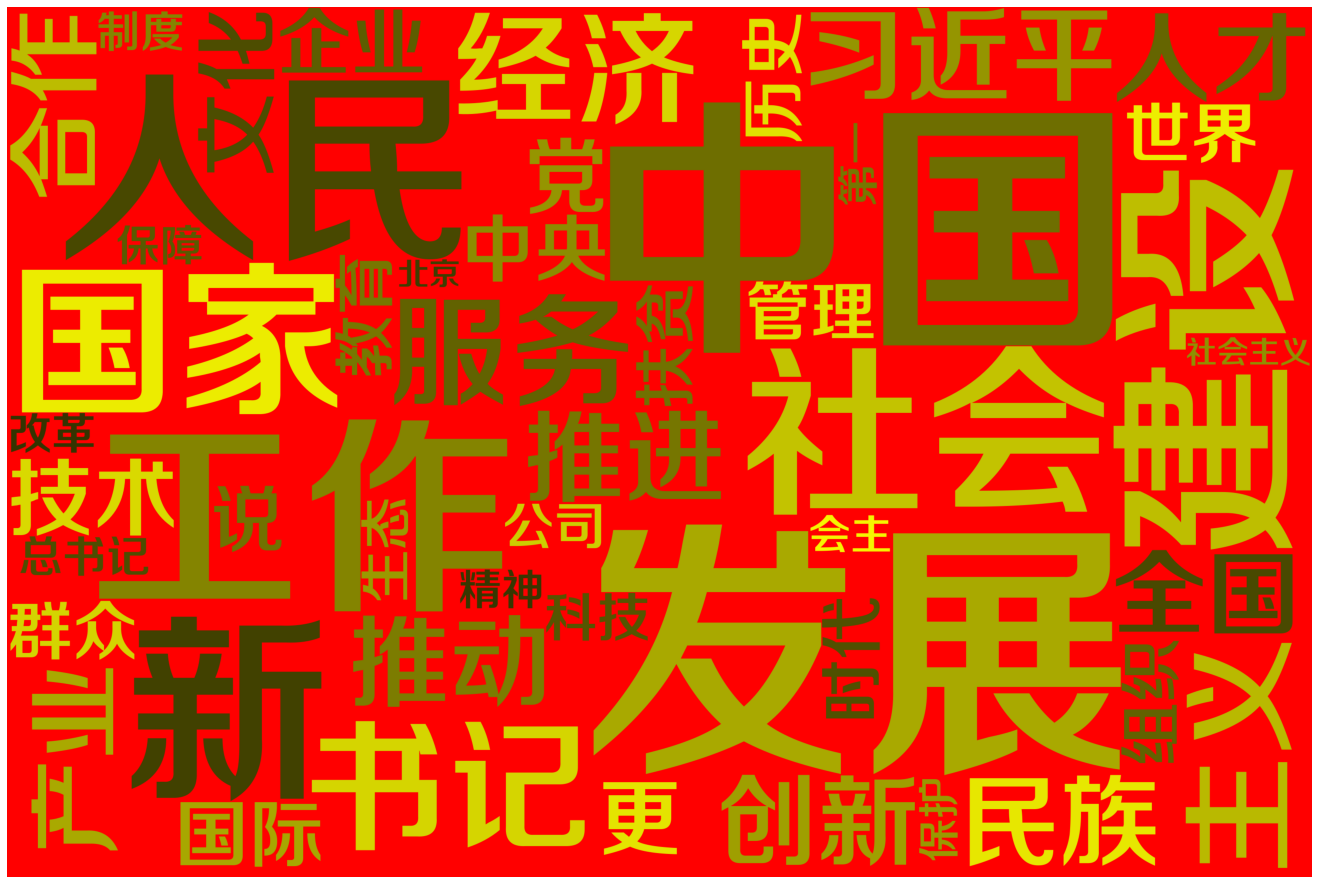

In [21]:
import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(font_path='../input/fonts-on-mac/Fonts/方正正中黑简体.TTF',width=3000,height=2000,background_color="red", max_words=50,color_func=wordcloud.get_single_color_func("yellow"))
wc.generate_from_frequencies(word_count)

wc.to_file("People's Daily WordCloud Zh.png")

plt.figure(figsize=(24,16))
plt.imshow(plt.imread("./People's Daily WordCloud Zh.png"))
plt.axis("off")
plt.show()

### 2.4 translate to English with YouDao API

In [22]:
import json
import requests
import re

def translator(str):
    """
    input : str
    output：translation
    """
    # API
    url = 'http://fanyi.youdao.com/translate?smartresult=dict&smartresult=rule&smartresult=ugc&sessionFrom=null'
    key = {
        'type': "AUTO",
        'i': str,
        "doctype": "json",
        "version": "2.1",
        "keyfrom": "fanyi.web",
        "ue": "UTF-8",
        "action": "FY_BY_CLICKBUTTON",
        "typoResult": "true"
    }
    # key
    response = requests.post(url, data=key)
    if response.status_code == 200:
        
        result = json.loads(response.text)
        translation = result['translateResult'][0][0]['tgt']
        return translation
    else:
        print("failed to use 有道 API")
        return None


In [23]:
translator('英文')

'English'

In [24]:
import re
def removeElse(s:str):
    pattern=r'^The \b|^To \b|\b of$|\b of the$|\b the$|^At the\b|\b are$'
    return re.sub(pattern,"",s)


In [25]:
En_word_count={}
for word in word_ds.head(50).index:
    En_word_count[removeElse(translator(word))]=word_count[word]
 
En_word_ds=pd.DataFrame(En_word_count,index=[0])
En_word_ds=En_word_ds.T
En_word_ds.columns=['count']

En_word_ds.sort_values(by=['count'],ascending=False,inplace=True)
En_word_ds.head(20)

,count
development,5572
China,5429
work,3030
people's,2854
new,2784
construction,2604
social,2584
countries,2561
secretary,2504
service,1776


### 2.5 create English WordCloud

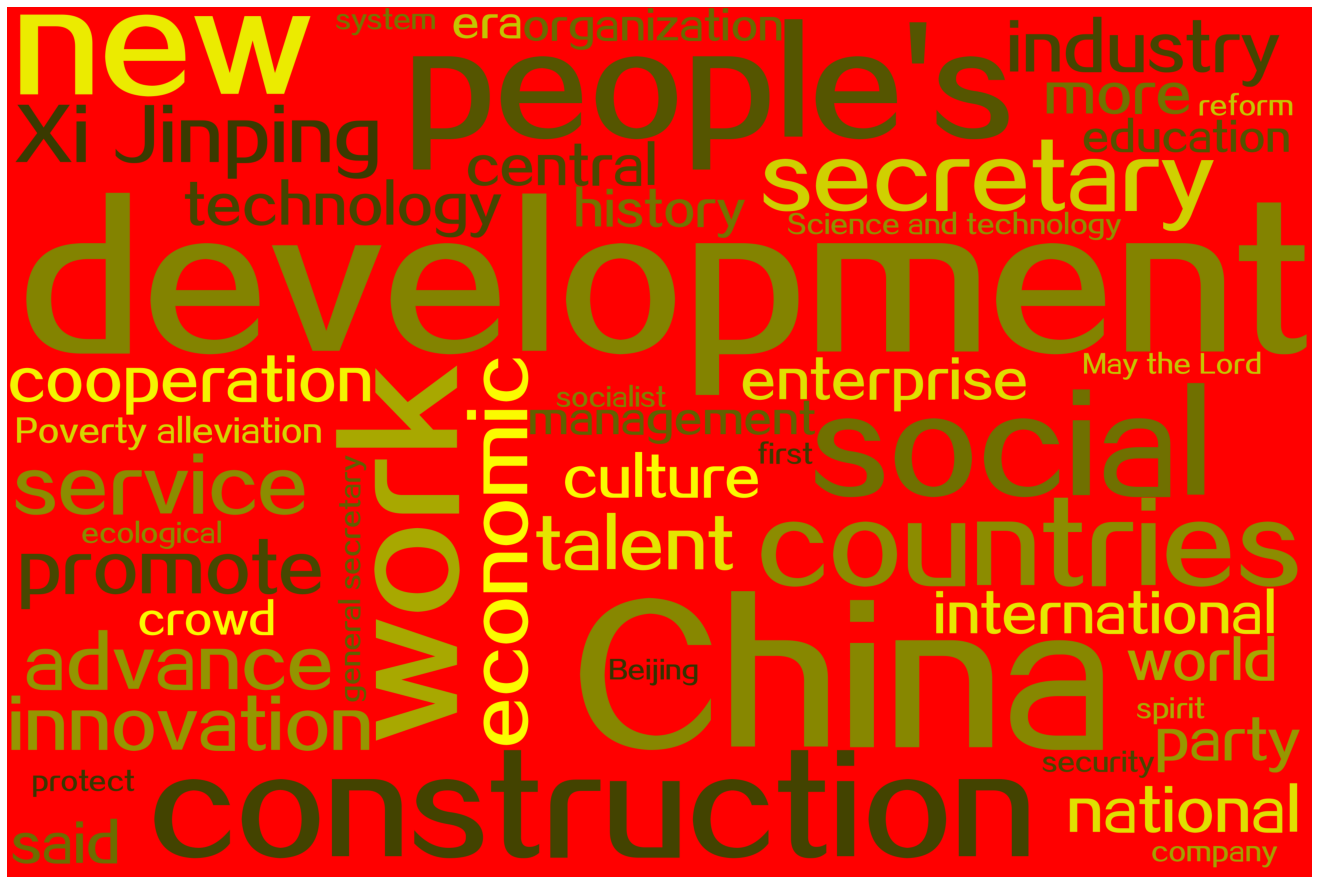

In [26]:
wc = WordCloud(font_path='../input/fonts-on-mac/Fonts/方正正中黑简体.TTF',width=3000,height=2000,background_color="red", max_words=50,color_func=wordcloud.get_single_color_func("yellow"))
wc.generate_from_frequencies(En_word_count)

wc.to_file("People's Daily WordCloud English.png")

plt.figure(figsize=(24,16))
plt.imshow(plt.imread("./People's Daily WordCloud English.png"))
plt.axis("off")
plt.show()

## 3. mix English and Chinese and generate WordCloud

In [27]:
from random import choice
Rand_word_count={}
for word in word_ds.head(50).index:
    if choice(['En','Zh']) == 'En':
        Rand_word_count[removeElse(translator(word))]=word_count[word]
    else:
        Rand_word_count[word]=word_count[word]
        
Rand_word_ds=pd.DataFrame(Rand_word_count,index=[0])
Rand_word_ds=Rand_word_ds.T
Rand_word_ds.columns=['count']

Rand_word_ds.sort_values(by=['count'],ascending=False,inplace=True)
Rand_word_ds.head(20)

,count
development,5572
中国,5429
work,3030
people's,2854
new,2784
建设,2604
social,2584
国家,2561
书记,2504
服务,1776


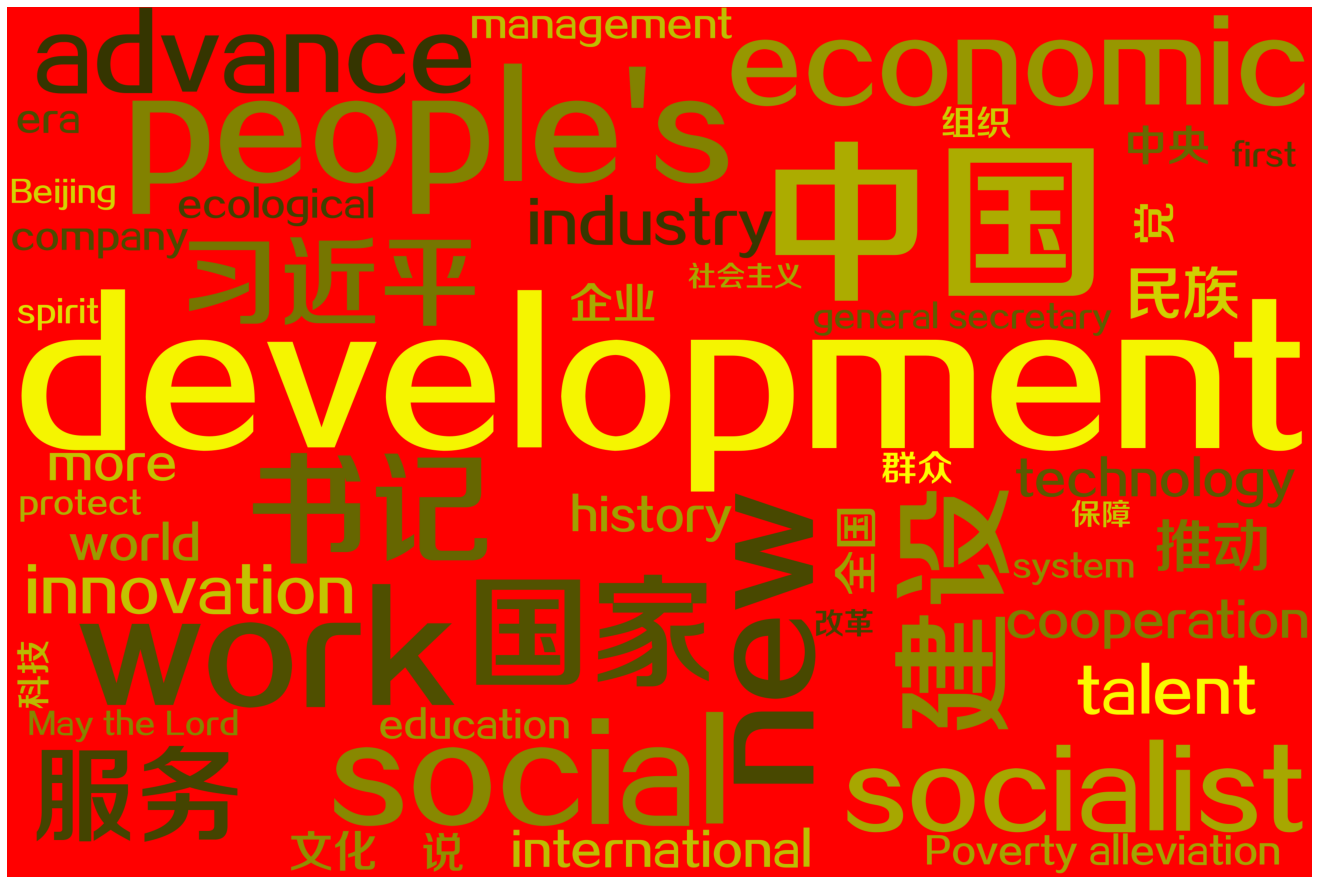

In [28]:
wc = WordCloud(font_path='../input/fonts-on-mac/Fonts/方正正中黑简体.TTF',width=3000,height=2000,background_color="red", max_words=50,color_func=wordcloud.get_single_color_func("yellow"))
wc.generate_from_frequencies(Rand_word_count)

wc.to_file("People's Daily WordCloud Both Zh and En.png")

plt.figure(figsize=(24,16))
plt.imshow(plt.imread("./People's Daily WordCloud Both Zh and En.png"))
plt.axis("off")
plt.show()